### Persiapan Data

#### 01. Import Library

In [124]:
# EDA
import pandas as pd
import numpy as np

In [125]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
# Text Cleaning
import neattext.functions as nfx

In [127]:
# Analisa Kalimat
from textblob import TextBlob as tb

In [128]:
# Machine Learning
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Save Model
import joblib


In [129]:
# Library Lainnya
from collections import Counter

#### 02. Load Data

In [130]:
# Membaca Dataset Berisi
dataset = pd.read_csv("Dataset Babak Penyisihan.csv")
dataset

,label,tweet
0,fear,Lebih menyeramkan kalo punya grup WA keluarga ...
1,joy,"Hepibesdey canteeeekk [USERNAME] panjang umur,..."
2,joy,Jumat lalu nonton inih! Selain tertarik settin...
3,joy,Nyante dulu.. Sruput kopi biar tambah bijak...
4,love,Happy annyversarry yg pertama kalinya .. Trsra...
...,...,...
5148,NaN,Aku termasuk orang yang tidak habis pikir deng...
5149,NaN,"Melawan sibuk Selasamu, jangan patah semangat ..."
5150,NaN,Momen di mana kamu merasa begitu mendalam terh...
5151,NaN,Tapi tentunya secara ini Bekasi ada hal-hal yg...


In [131]:
# Membuat Dataset Berisi dan Prediksi Terpisah
dataset_berisi = dataset.dropna(how = "any").reset_index(drop = True)
dataset_prediksi = dataset[dataset.isnull().any(axis = 1)].reset_index(drop = True)

#### 03. Data Cleaning

In [132]:
# Data Cleaning Column "tweet" dari dataset_prediksi
dataset_prediksi.dropna(subset = ["tweet"], inplace = True)
dataset_prediksi.reset_index(drop=True, inplace=True)

# Stopwords (Menghapus Kata Tidak Penting, seperti a, the, dll)
#dataset_prediksi["tweet"] = dataset_prediksi["tweet"].apply(nfx.remove_stopwords)

# Menghapus Kata [USERNAME]
#dataset_prediksi["tweet"] = dataset_prediksi['tweet'].str.replace(r"[USERNAME]", "")

# Menghapus koma, titik, dan lain lain
#dataset_prediksi["tweet"] = dataset_prediksi["tweet"].apply(nfx.remove_punctuations)

# Menghapus Emoji
#dataset_prediksi["tweet"] = dataset_prediksi["tweet"].apply(nfx.remove_emojis)

# Menghapus Lainnya Yang Tidak Perlu
#dataset_prediksi["tweet"] = dataset_prediksi["tweet"].apply(nfx.remove_userhandles)
#dataset_prediksi["tweet"] = dataset_prediksi["tweet"].apply(nfx.remove_special_characters)
#dataset_prediksi["tweet"] = dataset_prediksi["tweet"].apply(nfx.remove_non_ascii)

dataset_prediksi

,label,tweet
0,NaN,Saya taKan raguKan besarNya kasih sayang Tuhan...
1,NaN,Cc in ke cebong2 dungu... Maksd hati pengen ca...
2,NaN,"Nah, yg keterlaluan adl kalo ada pjbt eselon y..."
3,NaN,Melody masih membatasi diri ala member ya? Yan...
4,NaN,Rasa amarah ini membuatku merasa seperti aku a...
...,...,...
995,NaN,Aku termasuk orang yang tidak habis pikir deng...
996,NaN,"Melawan sibuk Selasamu, jangan patah semangat ..."
997,NaN,Momen di mana kamu merasa begitu mendalam terh...
998,NaN,Tapi tentunya secara ini Bekasi ada hal-hal yg...


In [133]:
# Data Cleaning Column "tweet" dari dataset_berisi
# Stopwords (Menghapus Kata Tidak Penting, seperti a, the, dll)
dataset_berisi["teks_bersih"] = dataset_berisi["tweet"].apply(nfx.remove_stopwords)

# Menghapus Kata [USERNAME]
dataset_berisi["teks_bersih"] = dataset_berisi['teks_bersih'].str.replace(r"[USERNAME]", "")

# Menghapus koma, titik, dan lain lain
dataset_berisi["teks_bersih"] = dataset_berisi["teks_bersih"].apply(nfx.remove_punctuations)

# Menghapus Emoji
dataset_berisi["teks_bersih"] = dataset_berisi["teks_bersih"].apply(nfx.remove_emojis) 

# Menghapus Lainnya Yang Tidak Perlu
dataset_berisi["teks_bersih"] = dataset_berisi["teks_bersih"].apply(nfx.remove_userhandles)
dataset_berisi["teks_bersih"] = dataset_berisi["teks_bersih"].apply(nfx.remove_special_characters)
dataset_berisi["teks_bersih"] = dataset_berisi["teks_bersih"].apply(nfx.remove_non_ascii)

dataset_berisi


,label,tweet,teks_bersih
0,fear,Lebih menyeramkan kalo punya grup WA keluarga ...,Lebih menyeramkan kalo punya grup WA keluarga ...
1,joy,"Hepibesdey canteeeekk [USERNAME] panjang umur,...",Hepibesdey canteeeekk panjang umur jadi priba...
2,joy,Jumat lalu nonton inih! Selain tertarik settin...,Jumat lalu nonton inih Selain tertarik setting...
3,joy,Nyante dulu.. Sruput kopi biar tambah bijak...,Nyante dulu Sruput kopi biar tambah bijak
4,love,Happy annyversarry yg pertama kalinya .. Trsra...,Happy annyversarry yg pertama kalinya Trsrah ...
...,...,...,...
4146,anger,sini berobat sama saya ini ngantri dokter saja...,sini berobat sama saya ini ngantri dokter saja...
4147,joy,Selamat pagi generasi Tik Tok yang kadang kepa...,Selamat pagi generasi Tik Tok yang kadang kepa...
4148,love,"Salah satu sahabat terbaik! Teman, kakak, insp...",Salah satu sahabat terbaik Teman kakak inspira...
4149,anger,[USERNAME] Gila kok ada ya perempuan pikiranny...,Gila kok ada ya perempuan pikirannya malah ny...


### Pemrosesan Data

In [134]:
# Banyak label emotion
dataset_berisi["label"].value_counts()

label
sadness    1122
joy        1002
anger       875
fear        654
love        498
Name: count, dtype: int64

c:\Users\rifqi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rifqi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rifqi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


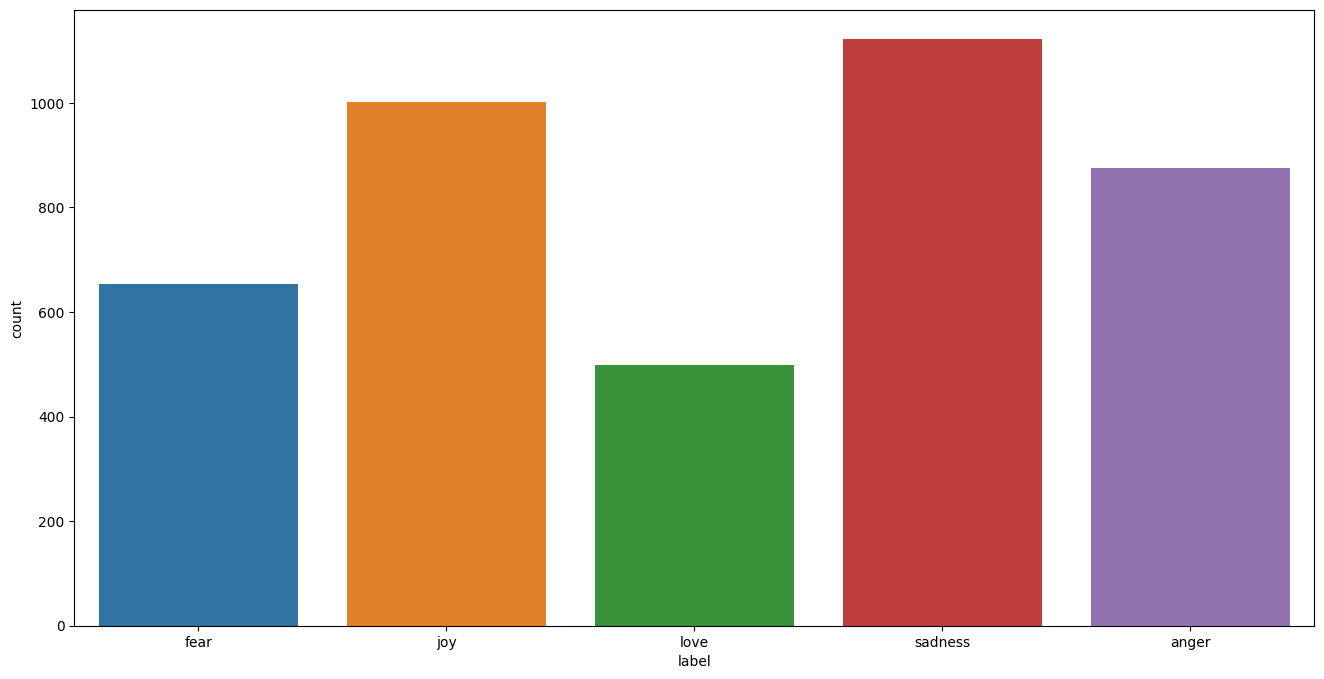

In [135]:
# Grafik bar dari banyaknya label emoticon
plt.figure(figsize=(16,8))
sns.countplot(x="label", data=dataset_berisi)
plt.show()

In [136]:
# Analisis sentimen
def sentimen(text):
    blob = tb(text)
    blob = blob.translate(from_lang='in', to='en')
    sentimen = blob.sentiment.polarity
    if sentimen > 0:
        return "Positif"
    elif sentimen < 0:
        return "Negatif"
    else:
        return "Netral"

In [137]:
# Fungsi ekstrak_keyword
def ekstrak_keyword(text, n = 50):
    token = [ token for token in text.split()]
    token_umum = Counter(token).most_common(n)
    return dict(token_umum)


In [138]:
# label_list
label_list = dataset_berisi['label'].unique().tolist()
label_list

['fear', 'joy', 'love', 'sadness', 'anger']

In [139]:
# Mengelompokkan semua kata dengan emotion "fear"
fear_list = dataset_berisi[dataset_berisi['label'] == label_list[0]]['teks_bersih'].tolist()
fear_doc = ' '.join(fear_list)
keyword_fear = ekstrak_keyword(fear_doc)
fear_doc

'Lebih menyeramkan kalo punya grup WA keluarga yg isinya sharing2 hadist  ayat AlQuran DAN grup WA lingkungan paroki gereja Serem kalo salah reply Ya gimana Diajak jalan aja gatau kenapa suka ada rasa takut Seringnya nolak Mungkin itu yang membuatku ga pernah bertahan lama hubungannya  ga pernah nyampe sebulan Eee e e kalo di imvu sih paling lama berapa yak Ya sama agun itu 3 bulan sama 2 bulan Hmmm Aku dulu nemu ig nya dia Pas dia lg liat camera gitu serem dah Itu gatau pake softlens atau gimana tapi matanya tuh jd gede bgt Entah gatau kenapa semakin bertambahnya umur malah semakin takut pacaran takut dikhianati ya semacam itu lah Tidak disemua tempat kita boleh melaksanakan sholat salah satunya di bangunan yang didirikan untuk kekafiran salah satunya gereja Aku berlindung kepada ALLAAH SWT dari godaan setan yang terkutuk rlt minta saran dong akukan pesen sepatu PO gitu nah biasanya datengnya seminggu 2minggu tapi ini udah lebih dari sebulan sepatunya ga dateng22 yaa belom bayar sih c

In [140]:
# Mengelompokkan semua kata dengan emotion "joy"
joy_list = dataset_berisi[dataset_berisi['label'] == label_list[1]]['teks_bersih'].tolist()
joy_doc = ' '.join(joy_list)
keyword_joy = ekstrak_keyword(joy_doc)
joy_doc

'Hepibesdey canteeeekk  panjang umur jadi pribadi yang jauh lebih baik semoga apa yang di citacitakan terwujud dan langgeng sama  Jumat lalu nonton inih Selain tertarik settingnya yg di Jogja aku penasaran stlh baca bahaya laten acak2 rambut di review Kak  Dan emang bagus banget Mata sembab gak karuan Nonton yuk mumpung masih tayang Nyante dulu Sruput kopi biar tambah bijak Penyelamat saat laper ya cuma Pop Mie sob Enaknya bikin nagih dan ga bikin baper Makanya kuy nyetok Pop Mie dari sekarang biar serunya lanjut terus URL Belajar bilang Alhamdulillah kalo dikasih masa masa yang sulit Alhamdulillah Allah masih sayang makanya diuji Alhamdulillah diingetinnya di dunia biar di akhirat gak masuk neraka Sedap betul Matur nuwun pak Heru Sudjatmoko atas pengabdian dan pelayanan panjenengan terhadap Jawa Tengah Semoga selalu diberikan kesehatan umur panjang dan sukses selalu kagem panjenengan tegaklurus satukomando URL Mau kirim salam buat  yang makin hari makin nyantol di hati salam jg buat o

In [141]:
# Mengelompokkan semua kata dengan emotion "love"
love_list = dataset_berisi[dataset_berisi['label'] == label_list[2]]['teks_bersih'].tolist()
love_doc = ' '.join(love_list)
keyword_love = ekstrak_keyword(love_doc)
love_doc

'Happy annyversarry yg pertama kalinya  Trsrah org mau blng apa aku gk pdli Ini yg aku rasain slma 1blan Aku cukup bhagia sm km smuanya baik aja jgn ada mslh yy sayang cemburu krna org lain wajarkan Dan smg kita juga makin mngrti satu sama lain Pada saat kamu menangis merengek meminta boneka atau mainan baru mama menatapmu iba Tetapi papa akan mengatakan dengan tegas  boleh kita beli nanti tapi tidak sekarang Gua suka sama Sodara gua sendiri dia itu cucu dari kakak ibu gua Kita dikenalin pas SMA sama kakak kelas gua Sekarang kita udah sama2 kuliah di bidang medis Gua sayang parah sm dia Cinta pada negeri yang membuat para pemuda mengobankan dirinya untuk bertempur mati matian di medan perang Dan cinta pada bangsa pula yang membuat mereka bersedia melepaskan senjata dan menghentikan pertempuran Seperti dulu aku mencintaimu sampai selamanya tanpa akhir cinta tak perlu alasan untuk mengalir aku sayang semua mutualku maap kalo belum bisa jadi mutual yang baik buat kalian luv TeenChoice Cho

In [142]:
# Mengelompokkan semua kata dengan emotion "sadness"
sadness_list = dataset_berisi[dataset_berisi['label'] == label_list[3]]['teks_bersih'].tolist()
sadness_doc = ' '.join(sadness_list)
keyword_sadness = ekstrak_keyword(sadness_doc)
sadness_doc

'beli kaos banyak dengan ukuran yg udah downgrade kucariin kok ngga ada ternyata masuk ke lemari Bapak mbak ART ku kayaknya ga notice aku udah kurusan Percaya kata lelaki itu terutama ketika aku ingin mati karena disiksa zaman Tapi karena kematian tak kunjung tiba aku melupakanNya Tuhan menjauh dan aku pun menjauhiNya Aku tidak tahu apa iya masih penting sejak kulupa ada saatnya sakit hati itu kita nikmatin dengan cara kita menangis salah satunya gembira pun bisa jadi alternatif lain yang terpenting semua itu bisa kita lewatin walaupun gagal Semalem pake baff kaos tangan sepatu lengkap kayak mau riding dan duduk didepan kasir habis sahur lg nungguin temen bayar dikasir biar selese bayar bisa langsung cabut eh dikira ojol yg lg nunggu orderan sama yg punya warung ntaps mas Bagi rapot itu batin haha misalnya nih indikator kepercayaan diri teman kecil perlu dibimbing lebih baik lagi Di satu sisi ini jadi pengingat dan cambukan kalo aku pun krisis kepercayaan diri hehe  dari tadi pagi saya

In [143]:
# Mengelompokkan semua kata dengan emotion "anger"
anger_list = dataset_berisi[dataset_berisi['label'] == label_list[4]]['teks_bersih'].tolist()
anger_doc = ' '.join(anger_list)
keyword_anger = ekstrak_keyword(anger_doc)
anger_doc

' tolong aplikasinya diberesin Saya tadi pesan katanya server error Eh muncul 4 taksi Khan kasian drivernya saya musti cancel Suka heran sama ukhti yang hobi nyindir dan ngurusin hidup orang lain apalagi ngomentarin hidup orang bawabawa visi misi bersama tolong profesyenel dong urusan pribadi sama urusan forum tyda usah dicampur adukkan klo milih pemimpin bukan petahana nanti jadinya gub tidak tahu  males kerja spt ini URL Seharusnya yg harus marah itu JKT58 yg milih klo ngerasa memang ada kemunduran ya lu olang wajar ngomel Mungkin JKT42 marah2 juga bisa jadi karena ada rasa sayang Eh gimana ditinggal disaat masih sayang2nya gitukan apapun bentuknya pelecehan tetaplah pelecehan halah gitu doang yaelah udah biasa kali sadar gak sih cat calling udah termasuk pelecehan lohh Momen di mana kamu merasa seperti semua yang kamu inginkan adalah meluapkan kemarahanmu tanpa ampun  UnleashTheAnger Waktu kalian jd oposisi Era Pak Harto Pak SBY kalian mudik lewat Jalan Tol jembatan pelabuhan yg dib

### Machine Learning

In [144]:
xfeatures = dataset_berisi['teks_bersih']
ylabels = dataset_berisi['label']

In [145]:
# Vectorizer

cv = CountVectorizer()
X = cv.fit_transform(xfeatures)

In [146]:
cv.get_feature_names_out()

array(['0000', '0015', '0025', ..., 'zonknya', 'zuhri', 'zulkifli'],
      dtype=object)

In [147]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [148]:
# Split Dataset

xtrain,xtest,ytrain,ytest= train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [149]:
#Model Building
#MultinomialNB

nvmodel = MultinomialNB()
nvmodel.fit(xtrain,ytrain)  


MultinomialNB()

In [150]:
#Accuracy test

nvmodel.score(xtest,ytest)

0.6252006420545746

In [151]:
#predictions
y_pred_for_nv= nvmodel.predict(xtest)

In [152]:
y_pred_for_nv

array(['anger', 'joy', 'anger', ..., 'anger', 'anger', 'sadness'],
      dtype='<U7')

In [153]:
# Test

sample_text = ['Aku cinta kamu']

In [154]:
vect = cv.transform(sample_text).toarray()

In [155]:
nvmodel.predict(vect)

array(['love'], dtype='<U7')

In [156]:
# Membandingkan Probabilitas di Antara Semua Label

nvmodel.predict_proba(vect)

array([[0.00602769, 0.00825446, 0.01027735, 0.83557068, 0.13986982]])

In [157]:
# Membandingkan robabilitas di Antara Semua Label (nama labelnya)

nvmodel.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness'], dtype='<U7')

In [158]:
# Pembuktian Bahwa "love" Merupakann yang Tertinggi

np.max(nvmodel.predict_proba(vect))

0.8355706774537466

In [159]:
# Fungsi predict_emotion
def predict_emotion (teks, model) :
    myvect = cv.transform(teks).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_, pred_proba[0]))
    #print("Prediksi : {}, Skor Prediksi : {}".format(prediction[0], np.max(pred_proba)))
    return prediction[0]

In [160]:
# Tes Fungsi predict_emotion
predict_emotion(["belajar bahasa minang sangat menyenangkan"], nvmodel)

'joy'

#### Model Evaluation

In [161]:
# Classification
print(classification_report(ytest, y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.72      0.67      0.69       263
        fear       0.70      0.53      0.61       212
         joy       0.69      0.60      0.64       301
        love       0.80      0.50      0.62       149
     sadness       0.48      0.73      0.58       321

    accuracy                           0.63      1246
   macro avg       0.68      0.61      0.63      1246
weighted avg       0.66      0.63      0.63      1246



In [162]:
# Confusion
confusion_matrix(ytest, y_pred_for_nv)

array([[176,  10,  14,   0,  63],
       [ 21, 113,  14,   2,  62],
       [ 18,  12, 181,  12,  78],
       [  6,   0,  22,  75,  46],
       [ 25,  26,  31,   5, 234]], dtype=int64)

#### Save Model

In [163]:
# Save Model
model_file = open("emotion_clalssification_nvnmodel.pkl", "wb")
joblib.dump(nvmodel, model_file)
model_file.close()

### Pengisian Tabel Kolom 'label' Kosong (Pembuktian Eng Ing Eng)

In [164]:
# Pengisian Tabel dataset_prediksi
for i in range(1000) :
    dataset_prediksi.loc[i, "label"] = predict_emotion([dataset_prediksi.loc[i, "tweet"]], nvmodel)

dataset_prediksi

,label,tweet
0,sadness,Saya taKan raguKan besarNya kasih sayang Tuhan...
1,anger,Cc in ke cebong2 dungu... Maksd hati pengen ca...
2,anger,"Nah, yg keterlaluan adl kalo ada pjbt eselon y..."
3,sadness,Melody masih membatasi diri ala member ya? Yan...
4,anger,Rasa amarah ini membuatku merasa seperti aku a...
...,...,...
995,sadness,Aku termasuk orang yang tidak habis pikir deng...
996,sadness,"Melawan sibuk Selasamu, jangan patah semangat ..."
997,love,Momen di mana kamu merasa begitu mendalam terh...
998,sadness,Tapi tentunya secara ini Bekasi ada hal-hal yg...


In [165]:
# Dump Tabel database_prediksi ke 1 file excel

excel_file_path = "dataset_prediksi.xlsx"
dataset_prediksi.to_excel(excel_file_path, index=False)